### This Notebook contains an analysis upon a group of images of Ancient Chinese Landscape Paintings.

### Topics:

- Image analysis
- Contour analysis
- OpenCV
- PIL.Image
- scipy.signal
- Curve fitting

### Motivation:

In the study of Urban Aesthetics, one important application is about how to construct a centralized business district, such as Lujiazui Financial District of Shanghai or Manhattan borough of New York City, so that it can exhibit a beautiful and representitative skyline when people look at the district from the other side of a river. Looking at Downtown Manhattan from Jersey City across Hudson River, for example. Or in Shanghai, China, we can have a nice view of the other side of Huangpu River when we take a walk along The Bund (Waitan). 

This application is essential to nowadays urban planning because a centralized business district can always represent the humanity and the economy of a cosmopolis. In this notebook, I want to make a study of the ***Skyline*** of a district. More specifically, one innovative approach/question is proposed here: 

- Can we find any design insight for a modern city skyline from the skylines appeared in Ancient Chinese Landscape Paintings?

This is a brand-new approach called "Landscape City Planning", and seldom it has research materials to the public. Let's try to open the black box. At least, provide some quantitative and logic foundations for this planning idea.

### Goals: 

- Get design insights, or find some patterns of skylines via landscape contour analysis.

### Main procedures:

- Firstly read the painting images, cut them with scale remained. 
- Then, use Python tools to obtain their main contours where contours are in png format. 
- We then retrieve data points from the contour images.
- For a quantitative analysis, we do an approximation for newly-generated data points to make the contour curve more smooth.
- Finally, we want to summarize some features that all the images share.

---------------------------------------
## My Work:

### Cut the image

In [9]:
from PIL import Image
RELATIVE_PATH = r"Image_Analysis\Raw_Images\Black_White_Paintings\11_BW.png"
im = Image.open(RELATIVE_PATH) 
  
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 
print(f'Size of the painting: {width} x {height}')
# Setting the points for cropped image 
# Setting the points for cropped image 
left = 0
top = 0
right = width 
bottom = 75
print(f"bottom = {bottom}")
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
w1, h1 = im1.size 
print(f'Size of skyline image: {w1} x {h1}')

# Shows the image in image viewer 
im1.show() 
SAVE_PATH = r"Image_Analysis\Cutted_Black_White\11_Cutted.png"
im1.save(SAVE_PATH)

Size of the painting: 2750 x 420
bottom = 75
Size of skyline image: 2750 x 75


Cutting - level of `bottom`

|Paiting_num|original_size|bottom|new_size|
|-----|-----|-----|-----|
| 1  |2142 x 823|275|2142 x 275|
| 2  |5920 x 1256|600|5920 x 600|
| 3 |6090 x 966|850|6090 x 850|
| 4  |16384 x 767|700|16384 x 700|
| 5  |5691 x 628|400|5691 x 628|
| 6 |5713 x 406|210|5713 x 210|
| 7  |16384 x 889|889|16384 x 889|
| 8  |9228 x 1582|700|9228 x 700|
| 9 |1689 x 173|100|1689 x 173|
| 10  |1777 x 312|145|1777 x 145|
| 11  |2750 x 420|75|2750 x 75|
| 12 |1654 x 526|250|1654 x 250|
| 13  |2380 x 567|250|2380 x 567|
| 14  |1010 x 250|250|1010 x 250|
| 15 |13590 x 2177|1400|13590 x 1400|
| 16  |1692 x 671|300|1692 x 300|
| 17  |1215 x 534|350|1215 x 350|
| 18 |1678 x 368|125|1678 x 125|
| 19  |1722 x 220|130|1722 x 130|
| 20 |13680 x 1747|800|13680 x 800|
| 21 |1726 x 336|275|1726 x 275|
| 22 |1728 x 480|390|1728 x 390|



### Read the contour

In [10]:
from PIL import Image
from pylab import *

# read image to array
im = array(Image.open(SAVE_PATH).convert('L'))

# from scipy.ndimage.filters import gaussian_filter
# im = gaussian_filter(im, sigma=2)

### Generate Contour curve and store

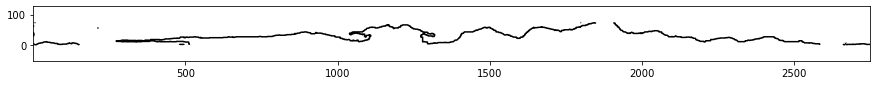

In [11]:
plt.figure(figsize = (15,1))
myplot = contour(im, levels=[100], colors='black', origin='image')
axis('equal')
SAVE_PATH_2 = r"Image_Analysis\Contour_Images\11_Contour.png"
plt.savefig(SAVE_PATH_2)

### Get fitted data from the external tool, store data into 11_Data.csv

- External Tool: https://apps.automeris.io/wpd/

### Use fitted data to plot the contour again

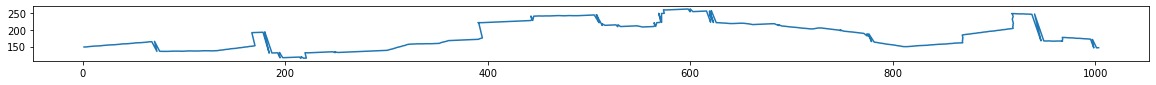

In [61]:
import pandas as pd
READ_CSV_PATH = r'Image_Analysis\Fitted_CSV\0401\City_1.csv'
data = pd.read_csv(READ_CSV_PATH, header=None, names=['x','y'])
plt.figure(figsize = (20,1))
plt.plot(data.x, data.y)

### Curve Smoothing

- After smoothing, y values: `yhat`


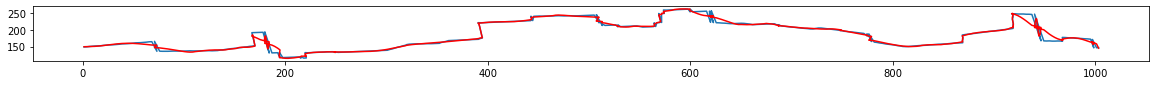

In [62]:
from PIL import Image
from pylab import *
from scipy.signal import savgol_filter

yhat = savgol_filter(data.y, 51, 7) # window size 51, polynomial order 3
plt.figure(figsize = (20,1))
plt.plot(data.x, data.y)
plt.plot(data.x, yhat, color='red')
SAVE_Smooth_PATH = r'Image_Analysis\Smoothed_Contours\0401\City_1.png'
plt.savefig(SAVE_Smooth_PATH)
plt.show()

### Try to summarize patterns:

#### 1. Standard Deviation: 
A common metric to measure the level of divergence within a group of data values
$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i-\mu)^2}$$
where $\sigma$ is one unit of std, $N$ is sample size，$y_i$ is one value，$\mu$ is the mean of the sample.

In [63]:
# standard deviation
sigma = yhat.std()

# count how many x are in the range of [mu-sigma, mu+sigma]
bottom = yhat.mean()- yhat.std()
up = yhat.mean()+ yhat.std()
cnt = 0
for yi in yhat:
    if yi >= bottom and yi<=up:
        cnt+=1
print(f'- sigma = {yhat.std():.2f}')
print(f'- We have {cnt/len(yhat)*100:.2f}% data are in the range of [mean-std, mean+std].')

- sigma = 38.23
- We have 61.64% data are in the range of [mean-std, mean+std].


1: 
- sigma = 86.59
- We have 67.92% data are in the range of [mean-std, mean+std].

2:
- sigma = 162.19
- We have 64.59% data are in the range of [mean-std, mean+std].

3:
- sigma = 196.46
- We have 59.32% data are in the range of [mean-std, mean+std].

4:
- sigma = 121.87
- We have 68.17% data are in the range of [mean-std, mean+std].

5:
- sigma = 60.50
- We have 70.69% data are in the range of [mean-std, mean+std].

6:
- sigma = 33.62
- We have 72.70% data are in the range of [mean-std, mean+std].

7:
- sigma = 178.07
- We have 64.63% data are in the range of [mean-std, mean+std].

8:
- sigma = 121.40
- We have 63.70% data are in the range of [mean-std, mean+std].

9:
- sigma = 19.85
- We have 73.30% data are in the range of [mean-std, mean+std].

10:
- sigma = 38.87
- We have 81.37% data are in the range of [mean-std, mean+std].

11:
- sigma = 15.59
- We have 64.82% data are in the range of [mean-std, mean+std].

12:
- sigma = 63.50
- We have 61.66% data are in the range of [mean-std, mean+std].

13:
- sigma = 57.19
- We have 57.94% data are in the range of [mean-std, mean+std].

14:
- sigma = 73.20
- We have 60.32% data are in the range of [mean-std, mean+std].

15:
- sigma = 191.16
- We have 73.40% data are in the range of [mean-std, mean+std].

16:
- sigma = 72.95
- We have 59.76% data are in the range of [mean-std, mean+std].

17:
- sigma = 86.54
- We have 62.28% data are in the range of [mean-std, mean+std].

18:
- sigma = 20.54
- We have 66.16% data are in the range of [mean-std, mean+std].

19:
- sigma = 29.16
- We have 59.85% data are in the range of [mean-std, mean+std].

20:
- sigma = 127.92
- We have 63.23% data are in the range of [mean-std, mean+std].

21:
- sigma = 61.21
- We have 57.14% data are in the range of [mean-std, mean+std].

22:
- sigma = 71.31
- We have 70.00% data are in the range of [mean-std, mean+std].


City_1:
- sigma = 7.84
- We have 70.50% data are in the range of [mean-std, mean+std].

City_2:
- sigma = 25.58
- We have 73.24% data are in the range of [mean-std, mean+std].

City_3:
- sigma = 58.34
- We have 81.66% data are in the range of [mean-std, mean+std].

City_4:
- sigma = 32.13
- We have 59.43% data are in the range of [mean-std, mean+std].

City_5:
- sigma = 27.27
- We have 61.46% data are in the range of [mean-std, mean+std].

City_6:
- sigma = 46.47
- We have 56.43% data are in the range of [mean-std, mean+std].

City_7:
- sigma = 44.67
- We have 61.25% data are in the range of [mean-std, mean+std].

City_8:
- sigma = 42.07
- We have 59.84% data are in the range of [mean-std, mean+std].

City_9:
- sigma = 38.23
- We have 61.64% data are in the range of [mean-std, mean+std].

#### 2. Distribution of yhat

If we get p-value < 0.05, then the sample does not follow a normal distribution.

N = 584
mean = 187.05


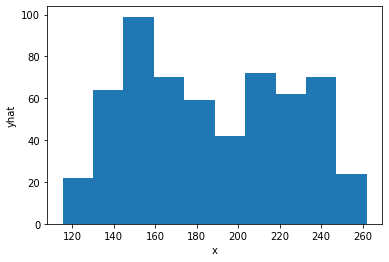

NormaltestResult(statistic=361.67634926274513, pvalue=2.9038798297232846e-79)

In [64]:
import scipy.stats

print(f'N = {len(yhat)}')
print(f'mean = {yhat.mean():.2f}')
plt.hist(yhat) # visualized the distribution
plt.ylabel('yhat')
plt.xlabel('x')
plt.show()

scipy.stats.normaltest(yhat)

### 3. Max Flunctuation, and its proportion to the entire painting

In [65]:
# maximum flunctuation
print(f"- The maximum of yhat is {yhat.max():.2f}")
print(f"- The minimum of yhat is {yhat.min():.2f}")
print(f"- The difference between extremes is {yhat.max()-yhat.min():.2f}")
print(f"- This flunctuate is about {(yhat.max()-yhat.min())/height*100:.2f}% of the original image height.")

- The maximum of yhat is 262.02
- The minimum of yhat is 115.34
- The difference between extremes is 146.68
- This flunctuate is about 34.92% of the original image height.


1:
- The maximum of yhat is 333.84
- The minimum of yhat is -0.83
- The difference between extremes is 334.67
- This flunctuate is about 40.66% of the original image height.

2:
- The maximum of yhat is 598.39
- The minimum of yhat is 36.36
- The difference between extremes is 562.03
- This flunctuate is about 44.75% of the original image height.

3:
- The maximum of yhat is 785.34
- The minimum of yhat is 53.07
- The difference between extremes is 732.27
- This flunctuate is about 75.80% of the original image height.

4:
- The maximum of yhat is 586.27
- The minimum of yhat is 22.21
- The difference between extremes is 564.06
- This flunctuate is about 73.54% of the original image height.

5:
- The maximum of yhat is 301.61
- The minimum of yhat is 7.23
- The difference between extremes is 294.38
- This flunctuate is about 46.88% of the original image height.

6:
- The maximum of yhat is 176.02
- The minimum of yhat is 10.33
- The difference between extremes is 165.70
- This flunctuate is about 40.81% of the original image height.

7:
- The maximum of yhat is 836.28
- The minimum of yhat is 13.05
- The difference between extremes is 823.22
- This flunctuate is about 92.60% of the original image height.

8:
- The maximum of yhat is 632.36
- The minimum of yhat is 45.76
- The difference between extremes is 586.60
- This flunctuate is about 37.08% of the original image height.

9:
- The maximum of yhat is 95.05
- The minimum of yhat is 5.30
- The difference between extremes is 89.75
- This flunctuate is about 51.88% of the original image height.

10:
- The maximum of yhat is 147.61
- The minimum of yhat is 4.88
- The difference between extremes is 142.73
- This flunctuate is about 45.75% of the original image height.

11: 
- The maximum of yhat is 68.24
- The minimum of yhat is 1.99
- The difference between extremes is 66.25
- This flunctuate is about 15.77% of the original image height.

12:
- The maximum of yhat is 238.88
- The minimum of yhat is 13.17
- The difference between extremes is 225.71
- This flunctuate is about 42.91% of the original image height.

13:
- The maximum of yhat is 232.22
- The minimum of yhat is 7.59
- The difference between extremes is 224.64
- This flunctuate is about 39.62% of the original image height.

14:
- The maximum of yhat is 235.22
- The minimum of yhat is 1.03
- The difference between extremes is 234.19
- This flunctuate is about 93.67% of the original image height.

15:
- The maximum of yhat is 1081.30
- The minimum of yhat is 187.99
- The difference between extremes is 893.31
- This flunctuate is about 41.03% of the original image height.

16:
- The maximum of yhat is 274.24
- The minimum of yhat is 6.70
- The difference between extremes is 267.54
- This flunctuate is about 39.87% of the original image height.

17:
- The maximum of yhat is 332.07
- The minimum of yhat is 37.19
- The difference between extremes is 294.88
- This flunctuate is about 55.22% of the original image height.

18:
- The maximum of yhat is 123.84
- The minimum of yhat is 20.42
- The difference between extremes is 103.42
- This flunctuate is about 28.10% of the original image height.

19:
- The maximum of yhat is 120.28
- The minimum of yhat is 5.64
- The difference between extremes is 114.64
- This flunctuate is about 52.11% of the original image height.

20:
- The maximum of yhat is 806.77
- The minimum of yhat is 258.28
- The difference between extremes is 548.49
- This flunctuate is about 31.40% of the original image height.

21:
- The maximum of yhat is 218.31
- The minimum of yhat is -0.64
- The difference between extremes is 218.95
- This flunctuate is about 65.16% of the original image height.

22:
- The maximum of yhat is 297.74
- The minimum of yhat is 18.51
- The difference between extremes is 279.23
- This flunctuate is about 58.17% of the original image height.

City_1:
- The maximum of yhat is 101.58
- The minimum of yhat is 66.19
- The difference between extremes is 35.39
- This flunctuate is about 8.43% of the original image height.

City_2:
- The maximum of yhat is 194.52
- The minimum of yhat is 89.08
- The difference between extremes is 105.44
- This flunctuate is about 25.10% of the original image height.

City_3:
- The maximum of yhat is 210.76
- The minimum of yhat is -0.45
- The difference between extremes is 211.22
- This flunctuate is about 50.29% of the original image height.

City_4:
- The maximum of yhat is 174.29
- The minimum of yhat is 74.59
- The difference between extremes is 99.69
- This flunctuate is about 23.74% of the original image height.

City_5:
- The maximum of yhat is 273.98
- The minimum of yhat is 155.24
- The difference between extremes is 118.74
- This flunctuate is about 28.27% of the original image height.

City_6:
- The maximum of yhat is 225.27
- The minimum of yhat is 63.32
- The difference between extremes is 161.95
- This flunctuate is about 38.56% of the original image height.

City_7:
- The maximum of yhat is 218.83
- The minimum of yhat is 40.14
- The difference between extremes is 178.69
- This flunctuate is about 42.54% of the original image height.

City_8:
- The maximum of yhat is 194.44
- The minimum of yhat is 35.58
- The difference between extremes is 158.86
- This flunctuate is about 37.82% of the original image height.

City_9:
- The maximum of yhat is 262.02
- The minimum of yhat is 115.34
- The difference between extremes is 146.68
- This flunctuate is about 34.92% of the original image height.

### 4. Building Primacy

Urban primacy indicates the ratio of the primate city to the next largest, i.e., the second largest in a country or region. In other words, urban primacy can be defined as the central place in an urban or city network that has acquired or obtained a great level of dominance.

We accommdate a similar idea here: building primacy, meansuring the ratio of the difference between the primate height and the mean height to the primate hight of the contour for each painting. 

$$\text{building primacy} = \frac{\text{max}(y_i)-\mu}{\text{max}(y_i)}$$
where $\text{max}(y_i)$ means the maximum height of the contour, $\mu$ is the mean height.

In [66]:
print(f"- The maximum of yhat is {yhat.max():.2f}")
print(f"- The mean of yhat is {yhat.mean():.2f}")
print(f"- Primacy = {(yhat.max()-yhat.mean())/yhat.max()*100:.2f}%")

- The maximum of yhat is 262.02
- The mean of yhat is 187.05
- Primacy = 28.61%


1: 
- The maximum of yhat is 333.84
- The mean of yhat is 221.45
- Primacy = 33.67%

2:
- The maximum of yhat is 598.39
- The mean of yhat is 300.06
- Primacy = 49.86%

3:
- The maximum of yhat is 785.34
- The mean of yhat is 432.48
- Primacy = 44.93%

4:
- The maximum of yhat is 586.27
- The mean of yhat is 287.50
- Primacy = 50.96%

5:
- The maximum of yhat is 301.61
- The mean of yhat is 176.11
- Primacy = 41.61%

6:
- The maximum of yhat is 176.02
- The mean of yhat is 66.75
- Primacy = 62.08%

7:
- The maximum of yhat is 836.28
- The mean of yhat is 515.22
- Primacy = 38.39%

8:
- The maximum of yhat is 632.36
- The mean of yhat is 244.95
- Primacy = 61.26%

9:
- The maximum of yhat is 95.05
- The mean of yhat is 42.81
- Primacy = 54.96%

10:
- The maximum of yhat is 147.61
- The mean of yhat is 47.51
- Primacy = 67.82%

11:
- The maximum of yhat is 68.24
- The mean of yhat is 27.26
- Primacy = 60.05%

12:
- The maximum of yhat is 238.88
- The mean of yhat is 105.04
- Primacy = 56.03%

13:
- The maximum of yhat is 232.22
- The mean of yhat is 132.89
- Primacy = 42.77%

14:
- The maximum of yhat is 235.22
- The mean of yhat is 120.97
- Primacy = 48.57%

15:
- The maximum of yhat is 1081.30
- The mean of yhat is 566.19
- Primacy = 47.64%

16:
- The maximum of yhat is 274.24
- The mean of yhat is 118.13
- Primacy = 56.93%

17:
- The maximum of yhat is 332.07
- The mean of yhat is 225.29
- Primacy = 32.16%

18:
- The maximum of yhat is 123.84
- The mean of yhat is 78.16
- Primacy = 36.89%

19:
- The maximum of yhat is 120.28
- The mean of yhat is 62.98
- Primacy = 47.64%

20:
- The maximum of yhat is 806.77
- The mean of yhat is 501.81
- Primacy = 37.80%

21:
- The maximum of yhat is 218.31
- The mean of yhat is 113.00
- Primacy = 48.24%

22:
- The maximum of yhat is 297.74
- The mean of yhat is 193.18
- Primacy = 35.12%


City_1:
- The maximum of yhat is 101.58
- The mean of yhat is 86.15
- Primacy = 15.19%

City_2:
- The maximum of yhat is 194.52
- The mean of yhat is 162.24
- Primacy = 16.60%

City_3:
- The maximum of yhat is 210.76
- The mean of yhat is 159.54
- Primacy = 24.30%

City_4:
- The maximum of yhat is 174.29
- The mean of yhat is 124.95
- Primacy = 28.31%

City_5:
- The maximum of yhat is 273.98
- The mean of yhat is 222.36
- Primacy = 18.84%

City_6:
- The maximum of yhat is 225.27
- The mean of yhat is 145.93
- Primacy = 35.22%

City_7:
- The maximum of yhat is 218.83
- The mean of yhat is 120.09
- Primacy = 45.12%

City_8:
- The maximum of yhat is 194.44
- The mean of yhat is 111.60
- Primacy = 42.61%

City_9:
- The maximum of yhat is 262.02
- The mean of yhat is 187.05
- Primacy = 28.61%

## Now, lets make some calculation on REAL City contour:

For cities, we have contours in .png files, so we again use the exteral tool to retrieve the data, and then store them into .csv for further analysis.

- External Tool: https://apps.automeris.io/wpd/

And repeat the calculation as before.

***Results are shown in markdowns above***

Note:

The City Contour image has no axis but all the images are in the same size, which is determined in advance. In the cell below, H stands for Height, W is Width, D is some constant in the study of City Planning. We calculate the ratio between h and w for the use of the exteral tool to determine the coordinates of curves.

In [68]:
import math
D = 3000
H = math.tan(math.radians(30))*D + math.tan(math.radians(40))*1.65
W = 2*math.pi*D/3

ratio = H/W

myW = 1000
myH = ratio*myW
print(f"x is from 0 to {myW}, and y is from 0 to {myH:.2f}.")

x is from 0 to 1000, and y is from 0 to 275.88.


In [1]:
import math
D = 3000
H = math.tan(math.radians(30))*D + math.tan(math.radians(40))*1.65
W = 6*math.pi*D

ratio = H/W

myW = 1000
myH = ratio*myW
print(f"x is from 0 to {myW}, and y is from 0 to {myH:.2f}.")

x is from 0 to 1000, and y is from 0 to 30.65.


After images are read by external tool:

C:\Users\xxxli\Anaconda3\envs\mysixenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\xxxli\Anaconda3\envs\mysixenv\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\xxxli\Anaconda3\envs\mysixenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


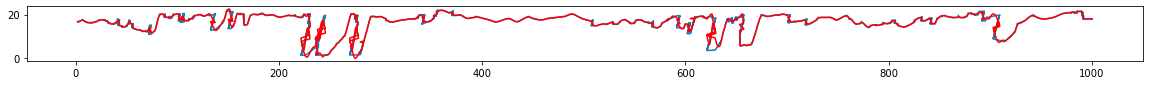

In [2]:
import pandas as pd
from pylab import *
READ_CSV_PATH = r'Contour_Image_Analysis\Fitted_CSV\Added_May9.csv'
data = pd.read_csv(READ_CSV_PATH, header=None, names=['x','y'])

from scipy.signal import savgol_filter
yhat = savgol_filter(data.y, 51, 7) # window size 51, polynomial order 3
plt.figure(figsize = (20,1))
plt.plot(data.x, data.y)
plt.plot(data.x, yhat, color='red')
SAVE_Smooth_PATH = r'Contour_Image_Analysis\Smoothed_Contours\0401\Added_May9.png'
plt.savefig(SAVE_Smooth_PATH)
plt.show()

In [3]:
# standard deviation
print("City_9:")
print(" ")
print("----- std -----")
sigma = yhat.std()

# count how many x are in the range of [mu-sigma, mu+sigma]
bottom = yhat.mean()- yhat.std()
up = yhat.mean()+ yhat.std()
cnt = 0
for yi in yhat:
    if yi >= bottom and yi<=up:
        cnt+=1
print(f'- sigma = {yhat.std():.2f}')
print(f'- We have {cnt/len(yhat)*100:.2f}% data are in the range of [mean-std, mean+std].')
print(" ")
print("---- primacy ----")
print(f"- The maximum of yhat is {yhat.max():.2f}")
print(f"- The mean of yhat is {yhat.mean():.2f}")
print(f"- Primacy = {(yhat.max()-yhat.mean())/yhat.max()*100:.2f}%")

City_9:
 
----- std -----
- sigma = 4.24
- We have 83.17% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 22.58
- The mean of yhat is 16.17
- Primacy = 28.41%


City_1:

----- std -----
- sigma = 20.53
- We have 66.50% data are in the range of [mean-std, mean+std].

---- primacy ----
- The maximum of yhat is 137.52
- The mean of yhat is 101.40
- Primacy = 26.27%

City_2:
 
----- std -----
- sigma = 16.33
- We have 74.48% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 160.64
- The mean of yhat is 133.91
- Primacy = 16.64%

City_3:
 
----- std -----
- sigma = 51.38
- We have 57.82% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 179.02
- The mean of yhat is 97.30
- Primacy = 45.65%

City_4:
 
----- std -----
- sigma = 14.01
- We have 69.15% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 146.28
- The mean of yhat is 111.64
- Primacy = 23.68%

City_5:
 
----- std -----
- sigma = 12.06
- We have 64.71% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 154.61
- The mean of yhat is 120.21
- Primacy = 22.25%

City_6:
 
----- std -----
- sigma = 54.17
- We have 64.46% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 203.45
- The mean of yhat is 123.75
- Primacy = 39.18%

City_7:
 
----- std -----
- sigma = 11.50
- We have 61.06% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 114.41
- The mean of yhat is 90.30
- Primacy = 21.07%

City_8:
 
----- std -----
- sigma = 14.67
- We have 63.48% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 161.01
- The mean of yhat is 131.42
- Primacy = 18.38%

City_9:
 
----- std -----
- sigma = 34.83
- We have 74.97% data are in the range of [mean-std, mean+std].
 
---- primacy ----
- The maximum of yhat is 126.08
- The mean of yhat is 88.48
- Primacy = 29.82%